# Capstone Project - The Battle of Neighborhoods

### Suitable location for a sandwich shop in New Orleans, USA

There are multiple parts to this notebook.

1. A description of the problem and a discussion of the background
2. A description of the data and how it will be used to solve the problem
3. Methodology and data analysis
4. Discussion and conclusions

## 1 - A description of the problem and a discussion of the background

People need to eat, someone said.
Mia loves to cook and her friends say that she makes "the greatest and best" sandwiches they ever had. She is happy to constantly ear about it, that she decided to try to open a small place. 
She lives in New Orleans, USA and she is looking for a good location and cheap but more important, a place where she can be sucessful. 
There are lots of factors that are in place that could tank really fast the business if she makes the wrong choices, so she decided to talk to some friends and asked for our help.

The goal is to look at the available data and help her to decide for the best location.
The task is to help to make a decision that makes sense for her, in this case to look for possible locations that are suitable.
The ideia from Mia is to have a small sandwich shop in New Orleans, USA.

### Some info about New Orleans

Acording to the article on Wikipedia, https://en.wikipedia.org/wiki/New_Orleans, New Orleans has interesting caractheristics for unique food experiences.

_"With an estimated population of 391,006 in 2018, it is the most populous city in Louisiana. Serving as a major port, New Orleans is considered an economic and commercial hub for the broader Gulf Coast region of the United States.
New Orleans is world-renowned for its distinct music, Creole cuisine, unique dialect, and its annual celebrations and festivals, most notably Mardi Gras. The historic heart of the city is the French Quarter, known for its French and Spanish Creole architecture and vibrant nightlife along Bourbon Street. The city has been described as the "most unique" in the United States."_

The city is also unique in a sense because of the Hurricane Katrina on 2005. With the flooding of more than 80% of the city, thousands of deaths, there was a population decline of over 50%.

### Criteria for the location

Again, from Wikipedia, New Orleans is world-famous for its food. There cuisine is unique that combines local Creole, haute Creole and New Orleans French cuisines. There local ingredients are French, Spanish, Italian, African, Native American, Cajun, Chinese, and a of Cuban to combine and produce a recognizable New Orleans flavor.

With all that in mind, Mia had no specific place she would like to be.
We will focus on the district options that would be benefit the restaurant, this is, where people are. This could be near other restaurants, near Universities, in the city center or the outskirts. It will depend on the data we have and what we do with it.

### Why use the data science approach

Without looking at the data to help to make the decision, Mia would spend some hours walking around the districs talking to many real estate agents and still ending up opening in a wrong place. Mia still has too do all that, but with the data hopefully she reduces time on that and that the presented solutions will be suitable to her needs.

### Outcome

The goal with this project is to identify the districs, look at the available data and the results will convey help to analyse the best locations for the business.

##  2 - A description of the data and how it will be used to solve the problem

### Data requirements

In 1980 the New Orleans City Planning Commission divided the city into 13 planning districts and 72 distinct neighborhoods. After the Katrina and 50% less population, the reality is not reflected here.

The data regarding the districts in New Orleans needs to be researched and a useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed.
The data will be used as input for the Foursquare API. That data output from the Foursquare API will be used to explore or compare districts around New Orleans, identifying the high traffic areas where consumers go for shopping, dining and entertainment as the logical and possible areas where to open this kind of business.

### The data workflow 

* __Outline from the initial data that is required:__
    * District data for New Orleans, USA, that includes neighborhood names and location data such as latitude and longitude
    
    
* __Obtaining the data:__
    * Rechearch and find sources for the neighborhood data for New Orleans
    * Acess and explore the data for manipulation
    

* __Initial data wrangling and cleaning:__
    * Clean the data by removing unnecessary fields and convert the data into a dataframe
    
    
* __Data analysis and location data:__
    * Fourquare location data will be used to explore and compare neighborhoods in New Orleans
    * Data manipulation to derive conclusions or other subset of data from the initial data
    * Use of data visualisation and statistical analysis
    

* __Visualization:__
    * Plotting the results of a data set to better understand the data by visualisation
    
    
* __Conclusions:__
    * Recomendations based on the data analysis
    * Discussion of results, limitations and conclusions

#### Import the necessary and required libraries

In [1]:
#Library imports
import numpy as np #library to handle data in a vectorized manner
import pandas as pd #library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json #library to handle JSON files
from pandas.io.json import json_normalize #tranform JSON file into a pandas dataframe

from bs4 import BeautifulSoup #library to handle scrapping of a webpage
import requests #library to handle requests
import csv

!conda install -c conda-forge geopy --yes #geolocation for the Foursquare API
from geopy.geocoders import Nominatim #convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes #map rendering library
import folium #map rendering library

#Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans #import k-means from clustering stage

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


## Research of the data and preparation

### New Orleans neighborhoods

These days internet is used for research of the data and the old days of spending much time in the libraries reading relevant books are almost gone.
That said, for the research of the data, this particular wikipedia page was used for scrapping the data for the neighboorhoods and their latitude and longitude, https://en.wikipedia.org/wiki/Neighborhoods_in_New_Orleans.

The reason for the scrapping of some wikipedia webpage, that could be incorrect, is that otherwise we would to have to manualy create some file, csv, excel or other, with all the required data, normalize it and then import that to the Jupiter notebook. If we had thousands of data input rows, that would take some time.

#### Wikipedia page scrapping

In [2]:
#Wikipedia page scrapping
web_url = requests.get('https://en.wikipedia.org/wiki/Neighborhoods_in_New_Orleans').text
soup = BeautifulSoup(web_url, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Neighborhoods in New Orleans - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XjZyBgpAICoAADy8ewoAAACD","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Neighborhoods_in_New_Orleans","wgTitle":"Neighborhoods in New Orleans","wgCurRevisionId":926331334,"wgRevisionId":926331334,"wgArticleId":3950865,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: multiple n

The above result is the request from the wikipedia page to the variable *web_url*.
By again looking at the wikipedia page, not all the data that is there is interesting for us. What we need is only the section with the table with the name of the neighborhoods and respective latitude/longitude.

#### Search for the specific table on the wikipage and put that data into a variable

In [3]:
#Find the specific table we need, using the beatifullSoup and put the data to a variable called table
table = soup.find('table',{'class':'wikitable sortable'})
table

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th><b>Neighborhood</b>
</th>
<th><b>Longitude</b>
</th>
<th><b>Latitude</b>
</th></tr>
<tr>
<td>U.S. NAVAL BASE
</td>
<td>-90.02609253
</td>
<td>29.94608469
</td></tr>
<tr>
<td>ALGIERS POINT
</td>
<td>-90.0516057
</td>
<td>29.95246187
</td></tr>
<tr>
<td>WHITNEY
</td>
<td>-90.04235744
</td>
<td>29.94720026
</td></tr>
<tr>
<td>AUDUBON
</td>
<td>-90.12145042
</td>
<td>29.93299437
</td></tr>
<tr>
<td>OLD AURORA
</td>
<td>-90
</td>
<td>29.92444011
</td></tr>
<tr>
<td>B. W. COOPER
</td>
<td>-90.09175301
</td>
<td>29.95177397
</td></tr>
<tr>
<td>BAYOU ST. JOHN
</td>
<td>-90.08651733
</td>
<td>29.97607064
</td></tr>
<tr>
<td>BEHRMAN
</td>
<td>-90.02643585
</td>
<td>29.9348167
</td></tr>
<tr>
<td>BLACK PEARL
</td>
<td>-90.13488293
</td>
<td>29.93589521
</td></tr>
<tr>
<td>BROADMOOR
</td>
<td>-90.10381222
</td>
<td>29.9465681
</td></tr>
<tr>
<td>MARLYVILLE - FONTAINEBLEAU
</td>
<td>-90.11346817
</td>
<td>29.95300103
</td></tr>

We can clearly see now that we have the data we want. The next step is to gather all that into a dataframe.

#### Data into dataframe

In [4]:
#Pandas reads the html from the variable table and cast as a string to the dataframe
df = pd.read_html(str(table))
df = df[0]

We had lots of problems with the hidden characters that came from the webpage by using the method teached in examples from the course. We tested that with other pages worked, but somehow with this table did not work.

#### Changing the variable name and dataframe display

In [5]:
# copy the dataframe into new_orleans variable and display
new_orleans = df
new_orleans

,Neighborhood,Longitude,Latitude
0,U.S. NAVAL BASE,-90.026093,29.946085
1,ALGIERS POINT,-90.051606,29.952462
2,WHITNEY,-90.042357,29.947200
3,AUDUBON,-90.121450,29.932994
4,OLD AURORA,-90.000000,29.924440
5,B. W. COOPER,-90.091753,29.951774
6,BAYOU ST. JOHN,-90.086517,29.976071
7,BEHRMAN,-90.026436,29.934817
8,BLACK PEARL,-90.134883,29.935895
9,BROADMOOR,-90.103812,29.946568


In the above cell we see the data in the dataframe. That consists of the neighborhood names, longitudes and latitudes as expected.

In [6]:
# Number of values in dataframe
new_orleans.shape

(72, 3)

In [7]:
#Dataframe  data type
new_orleans.dtypes

Neighborhood     object
Longitude       float64
Latitude        float64
dtype: object

#### Discussion of the problem and data workflow

We have so far, imported the necessary libraries to work, located the data we need in the internet, scraped and imported from a wikipedia page and constructed a dataframe. 

## 3 - Methodology and data analysis

The data will now be used as input for the Foursquare API. That data output from the Foursquare API will be used to explore or compare districts around New Orleans, identifying the high traffic areas where consumers go for shopping, dining and entertainment as the logical and possible areas where to open this kind of business.

* __Data analysis and location data:__
    * Fourquare location data will be used to explore and compare neighborhoods in New Orleans
    * Data manipulation to derive conclusions or other subset of data from the initial data
    * Use of data visualisation and statistical analysis
    

* __Visualization:__
    * Plotting the results of a data set to better understand the data by visualisation
    
    
* __Conclusions:__
    * Recomendations based on the data analysis
    * Discussion of results, limitations and conclusions

#### Getting the latitude and longitude from New Orleans, USA by using Nomatim

In [8]:
#Get latitude and longitude from New Orleans, USA
address = 'New Orleans, USA'

geolocator = Nominatim(user_agent="nor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of New Orleans is {}, {}.'.format(latitude, longitude))

The geographical coordinates of New Orleans is 29.9499323, -90.0701156.


The above cell give us the coordinates of New Orleans so that we can use to draw a map.

#### Creating the map of New Orleans with the neighborhoods

In [9]:
#Create map of New Orleans with lat, long
map_nor = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, local in zip(new_orleans['Latitude'], new_orleans['Longitude'], new_orleans['Neighborhood']):
    label = '{}'.format(local)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_nor)  
    
map_nor

The above representation is the New Orleans map with the data from latitude/longitude from the neighborhoods that are represented in the blue circles.

#### Getting the credentials for the Foursquare API

In [10]:
# Define Foursquare credentials and version
CLIENT_ID = 'Q4WHO1FWW0VRZL0151VFYLE3KDVGSBHMKES2XKRWU5UTF0CU' # your Foursquare ID
CLIENT_SECRET = '3JF0X5YBDWT43GC5SY34UI4VRRP2KSYTPP0KN30UEW3HWOJQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Q4WHO1FWW0VRZL0151VFYLE3KDVGSBHMKES2XKRWU5UTF0CU
CLIENT_SECRET:3JF0X5YBDWT43GC5SY34UI4VRRP2KSYTPP0KN30UEW3HWOJQ


The above code give us the ID and credentials needed to use the Foursquare API.

#### Analysing the data by picking one neighborhood from the dataframe

In [11]:
# Random neighborhood in the dataframe
new_orleans.loc[12]

Neighborhood    MID-CITY
Longitude       -90.0994
Latitude         29.9704
Name: 12, dtype: object

The above was not as random as wanted, because there was not that much data from the other neighborhoods. We decided to pick a central location from the map.

#### Getting the longitude and latitude from the above described neighborhood

In [12]:
#Get lat and long values
neighborhood_lng = new_orleans.loc[12, 'Longitude']
neighborhood_lat = new_orleans.loc[12, 'Latitude']
neighborhood_name = new_orleans.loc[12, 'Neighborhood']
print('Longitude and Latitude values of the {} are {} and {}.'.format(neighborhood_name, neighborhood_lng, neighborhood_lat))

Longitude and Latitude values of the MID-CITY are -90.09939194 and 29.97040133.


These are the latitude and longitudes from the neigborhood that we picked.

#### Getting the 100 venues that are in the neighborhood of MID-CITY within a 500 meter radius

In [13]:
#Get the top 100 venues that are in the neighborhood with a radius of 500 meters
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_lng, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=Q4WHO1FWW0VRZL0151VFYLE3KDVGSBHMKES2XKRWU5UTF0CU&client_secret=3JF0X5YBDWT43GC5SY34UI4VRRP2KSYTPP0KN30UEW3HWOJQ&v=20180605&ll=29.97040133,-90.09939194&radius=500&limit=100'

These results are from the search by using the Foursquare API.

#### Looking at the results from the previous query

In [14]:
#Send the get to examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e42ff2b9fcb92001bfca61f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Mid-City',
  'headerFullLocation': 'Mid-City, New Orleans',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 21,
  'suggestedBounds': {'ne': {'lat': 29.974901334500007,
    'lng': -90.09420702993971},
   'sw': {'lat': 29.965901325499996, 'lng': -90.1045768500603}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad4c050f964a520aaf420e3',
       'name': "Mona's Cafe & Deli",
       'location': {'address': '3901 Banks St',
        'crossStreet': 'at S Scott St',
        'lat': 29.970743624771448,
        'lng': -90.10093443757762,
        'labeledLatLngs':

The results is a json file with the data that we requested earlier.

#### Creating a function to extract from the json the category of the venue

In [15]:
#Function to extract the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Manipulation of the data and put it in a dataframe

In [16]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Mona's Cafe & Deli,Mediterranean Restaurant,29.970744,-90.100934
1,Finn McCool's Irish Pub,Pub,29.969473,-90.099202
2,Twelve Mile Limit,Cocktail Bar,29.968351,-90.099881
3,Mandina's Restaurant,Cajun / Creole Restaurant,29.972350,-90.097580
4,Juan's Flying Burrito,Mexican Restaurant,29.973891,-90.100948


The above cell gives us a sample of the venues with the name, latitude and longitude and what type of venue they are.

#### How many venues where returned by the Foursquare API ?

In [17]:
#Check how many venues are returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

21 venues were returned by Foursquare.


#### Now, repeating all the above process but for all of the neighborhoods

In [18]:
#Function for nearby venues for all the neighborhoods in New Orleans
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[] #array for the venues list
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In the above code we have created a function so that we can pass the values of the neighborhoods.

#### Create a new dataframe for the New Orleans venues

In [19]:
#Create a new dataframe called new_orleans_venues
new_orleans_venues = getNearbyVenues(names = new_orleans['Neighborhood'], latitudes = new_orleans['Latitude'], longitudes = new_orleans['Longitude'])

U.S. NAVAL BASE
ALGIERS POINT
WHITNEY
AUDUBON
OLD AURORA
B. W. COOPER
BAYOU ST. JOHN
BEHRMAN
BLACK PEARL
BROADMOOR
MARLYVILLE - FONTAINEBLEAU
GERT TOWN
MID-CITY
ST. CLAUDE
CENTRAL BUSINESS DISTRICT
FRENCH QUARTER
CENTRAL CITY
LAKE CATHERINE
VILLAGE DE LEST
VIAVANT - VENETIAN ISLES
NEW AURORA - ENGLISH TURN
TALL TIMBERS - BRECHTEL
FISCHER DEV
McDONOGH
LOWER GARDEN DISTRICT
ST. THOMAS DEV
EAST RIVERSIDE
IRISH CHANNEL
TOURO
MILAN
UPTOWN
WEST RIVERSIDE
EAST CARROLLTON
FRERET
GARDEN DISTRICT
LEONIDAS
HOLLYGROVE
TULANE - GRAVIER
TREME - LAFITTE
SEVENTH WARD
MARIGNY
ST. ROCH
DIXON
LAKEWOOD
NAVARRE
CITY PARK
LAKEVIEW
WEST END
LAKESHORE - LAKE VISTA
FILMORE
ST. BERNARD AREA
DILLARD
ST. ANTHONY
LAKE TERRACE & OAKS
MILNEBURG
PONTCHARTRAIN PARK
GENTILLY WOODS
GENTILLY TERRACE
DESIRE AREA
FLORIDA AREA
FLORIDA DEV
LOWER NINTH WARD
BYWATER
HOLY CROSS
PINES VILLAGE
PLUM ORCHARD
READ BLVD WEST
READ BLVD EAST
WEST LAKE FOREST
LITTLE WOODS
FAIRGROUNDS
IBERVILLE


#### How many venues did we get ?

In [20]:
print(new_orleans_venues.shape)

(915, 7)


#### Looking at a sample from the venues

In [21]:
new_orleans_venues.head(100)

,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,U.S. NAVAL BASE,29.946085,-90.026093,The Mighty Missisippi,29.949695,-90.023710,Boat or Ferry
1,ALGIERS POINT,29.952462,-90.051606,Tout de Suite Café,29.952121,-90.051090,Café
2,ALGIERS POINT,29.952462,-90.051606,Congregation Coffee Roasters,29.951918,-90.053395,Coffee Shop
3,ALGIERS POINT,29.952462,-90.051606,The Crown & Anchor,29.951416,-90.054220,Bar
4,ALGIERS POINT,29.952462,-90.051606,Levee @ Algiers Point,29.951760,-90.048747,Scenic Lookout
5,ALGIERS POINT,29.952462,-90.051606,Old Point Bar,29.954940,-90.050226,Bar
6,ALGIERS POINT,29.952462,-90.051606,The Dry Dock Cafe & Bar,29.952053,-90.054769,Bar
7,ALGIERS POINT,29.952462,-90.051606,Wednesdays on the Point,29.954159,-90.054473,Music Venue
8,ALGIERS POINT,29.952462,-90.051606,Tavolino Pizza & Lounge,29.952053,-90.054597,Pizza Place
9,ALGIERS POINT,29.952462,-90.051606,Rosetree Blown Glass Studio,29.951072,-90.048804,Arts & Crafts Store


In the above cell there are 100 venues as a sample, just to verify that all went well.

#### How many venues where returned for each neighborhood ?

In [22]:
#Check how many venues where returned for each neighborhood
new_orleans_venues.groupby('Neighborhood').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ALGIERS POINT,25,25,25,25,25,25
AUDUBON,11,11,11,11,11,11
B. W. COOPER,5,5,5,5,5,5
BAYOU ST. JOHN,6,6,6,6,6,6
BLACK PEARL,5,5,5,5,5,5
BROADMOOR,5,5,5,5,5,5
BYWATER,13,13,13,13,13,13
CENTRAL BUSINESS DISTRICT,100,100,100,100,100,100
CENTRAL CITY,4,4,4,4,4,4


There is a limit of 100 venues of the Foursquare API. Besides that detail, we can observe that there are really not that many venues in New Orleans.

#### How many of those returned venues are unique ?

In [23]:
#Calculate how many unique venue categories are there
print('There are {} unique venue categories.'.format(len(new_orleans_venues['Venue Category'].unique())))

There are 206 unique venue categories.


#### Categorize and analyze each of the neighborhoods 

In [24]:
#Analyse each of the neighborhood
# one hot encoding
new_orleans_onehot = pd.get_dummies(new_orleans_venues[['Venue Category']], prefix="", prefix_sep="")

#add neighborhood column back to dataframe
new_orleans_onehot['Neighborhood'] = new_orleans_venues['Neighborhood'] 

#move neighborhood column to the first column
fixed_columns = [new_orleans_onehot.columns[-80]] + list(new_orleans_onehot.columns[:-80])
new_orleans_onehot = new_orleans_onehot[fixed_columns]

new_orleans_onehot.head(30)

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Theater,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Frame Store,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Historic Site,History Museum,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Lake,Light Rail Station,Lounge,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,National Park
0,U.S. NAVAL BASE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALGIERS POINT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ALGIERS POINT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ALGIERS POINT,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ALGIERS POINT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,ALGIERS POINT,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,ALGIERS POINT,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,ALGIERS POINT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,ALGIERS POINT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Like stated before, there are not that many venues.

#### How many values do we have ?

In [25]:
#shape of dataframe
new_orleans_onehot.shape

(915, 127)

#### Group the rows by neighborhood and calculate the mean frequency for each category

In [26]:
#Group rows by neighborhood and take the mean frequency for each category
new_orleans_grouped = new_orleans_onehot.groupby('Neighborhood').mean().reset_index()
new_orleans_grouped

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Theater,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Frame Store,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Historic Site,History Museum,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Lake,Light Rail Station,Lounge,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,National Park
0,ALGIERS POINT,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.120000,0.000000,0.00,0.000,0.040000,0.000000,0.000000,0.00,0.000000,0.000000,0.160000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.040000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.080000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.04,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.040000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.040000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.00,0.000000,0.040000,0.00,0.000000
1,AUDUBON,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.181818,0.090909,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.00,0.000000,0.000000,0.00,0.000000
2,B. W. COOPER,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.00,0.

#### What is the shape of this particular data ?

In [27]:
#The shape of the group data(fr calc)
new_orleans_grouped.shape

(67, 127)

#### Neighborhoods with the top 10 most common venues

In [28]:
#Each neighborhood with the top 10 most common venues
num_top_venues = 10

for hood in new_orleans_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = new_orleans_grouped[new_orleans_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALGIERS POINT----
               venue  freq
0      Boat or Ferry  0.16
1                Bar  0.12
2        Coffee Shop  0.08
3          Gift Shop  0.04
4       Intersection  0.04
5    Bed & Breakfast  0.04
6       Cupcake Shop  0.04
7      Historic Site  0.04
8  Food & Drink Shop  0.04
9               Café  0.04


----AUDUBON----
                   venue  freq
0            Coffee Shop  0.18
1  College Arts Building  0.09
2      Accessories Store  0.00
3   Fast Food Restaurant  0.00
4                 Hostel  0.00
5           Home Service  0.00
6         History Museum  0.00
7          Historic Site  0.00
8         Hardware Store  0.00
9        Harbor / Marina  0.00


----B. W. COOPER----
                  venue  freq
0            Boxing Gym   0.2
1  Gym / Fitness Center   0.2
2            Food Truck   0.2
3        Breakfast Spot   0.2
4        Hardware Store   0.0
5                   Gym   0.0
6              Gym Pool   0.0
7      Halal Restaurant   0.0
8       Harbor / Marina   0.0

So far, from the data it seems that New Orleans is almost a ghost town.

#### Put the above data in a new dataframe and sort the venues in descending order

In [29]:
#Put the data in a dataframe and sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Top 10 venue categories for each neighborhood

In [30]:
#Top 10 venues for each neighboorhood
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
new_orleans_venues_sorted = pd.DataFrame(columns=columns)
new_orleans_venues_sorted['Neighborhood'] = new_orleans_grouped['Neighborhood']

for ind in np.arange(new_orleans_grouped.shape[0]):
    new_orleans_venues_sorted.iloc[ind, 1:] = return_most_common_venues(new_orleans_grouped.iloc[ind, :], num_top_venues)

new_orleans_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALGIERS POINT,Boat or Ferry,Bar,Coffee Shop,Music Venue,Café,Bed & Breakfast,Arts & Crafts Store,Historic Site,Cupcake Shop,Food & Drink Shop
1,AUDUBON,Coffee Shop,College Arts Building,National Park,College Theater,Bus Stop,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Cheese Shop
2,B. W. COOPER,Food Truck,Breakfast Spot,Boxing Gym,Gym / Fitness Center,Chinese Restaurant,Cocktail Bar,Clothing Store,Climbing Gym,Church,National Park
3,BAYOU ST. JOHN,Gas Station,Lounge,College Theater,Bus Stop,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Cheese Shop,Chinese Restaurant
4,BLACK PEARL,Farmers Market,Movie Theater,Grocery Store,National Park,Chinese Restaurant,Cocktail Bar,Clothing Store,Climbing Gym,Church,Caribbean Restaurant
5,BROADMOOR,Food Truck,Music Venue,Coffee Shop,National Park,Cocktail Bar,Clothing Store,Climbing Gym,Church,Chinese Restaurant,Cheese Shop
6,BYWATER,Coffee Shop,Fried Chicken Joint,Hotel,Gym / Fitness Center,Indie Theater,Boat or Ferry,Caribbean Restaurant,Discount Store,Music Venue,Credit Union
7,CENTRAL BUSINESS DISTRICT,Hotel,Coffee Shop,Hotel Bar,Bar,Café,Italian Restaurant,Cocktail Bar,Juice Bar,Cajun / Creole Restaurant,Bakery
8,CENTRAL CITY,Cajun / Creole Restaurant,Grocery Store,National Park,College Arts Building,Bus Stop,Café,Campground,Caribbean Restaurant,Cheese Shop,Chinese Restaurant
9,CITY PARK,Baseball Field,National Park,College Theater,Bus Stop,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Cheese Shop,Chinese Restaurant


This table is important because it gives us an overview for all neighborhoods and the top categories of the business.

#### What is the shape of the data ?

In [31]:
#shape of sorted data
new_orleans_venues_sorted.shape

(67, 11)

### Further analisys and ploting of some data

#### Where to place the sandwich shop ?

This would be the place and time for Mia to decide where to go, which neighborhood would be more viable. At this point the more viable solution would be to have a food truck and go around the neighborhoods. Lets's look at the density of some locations.
For that we use a violin plot to visualize the frequency distriduition dataset.

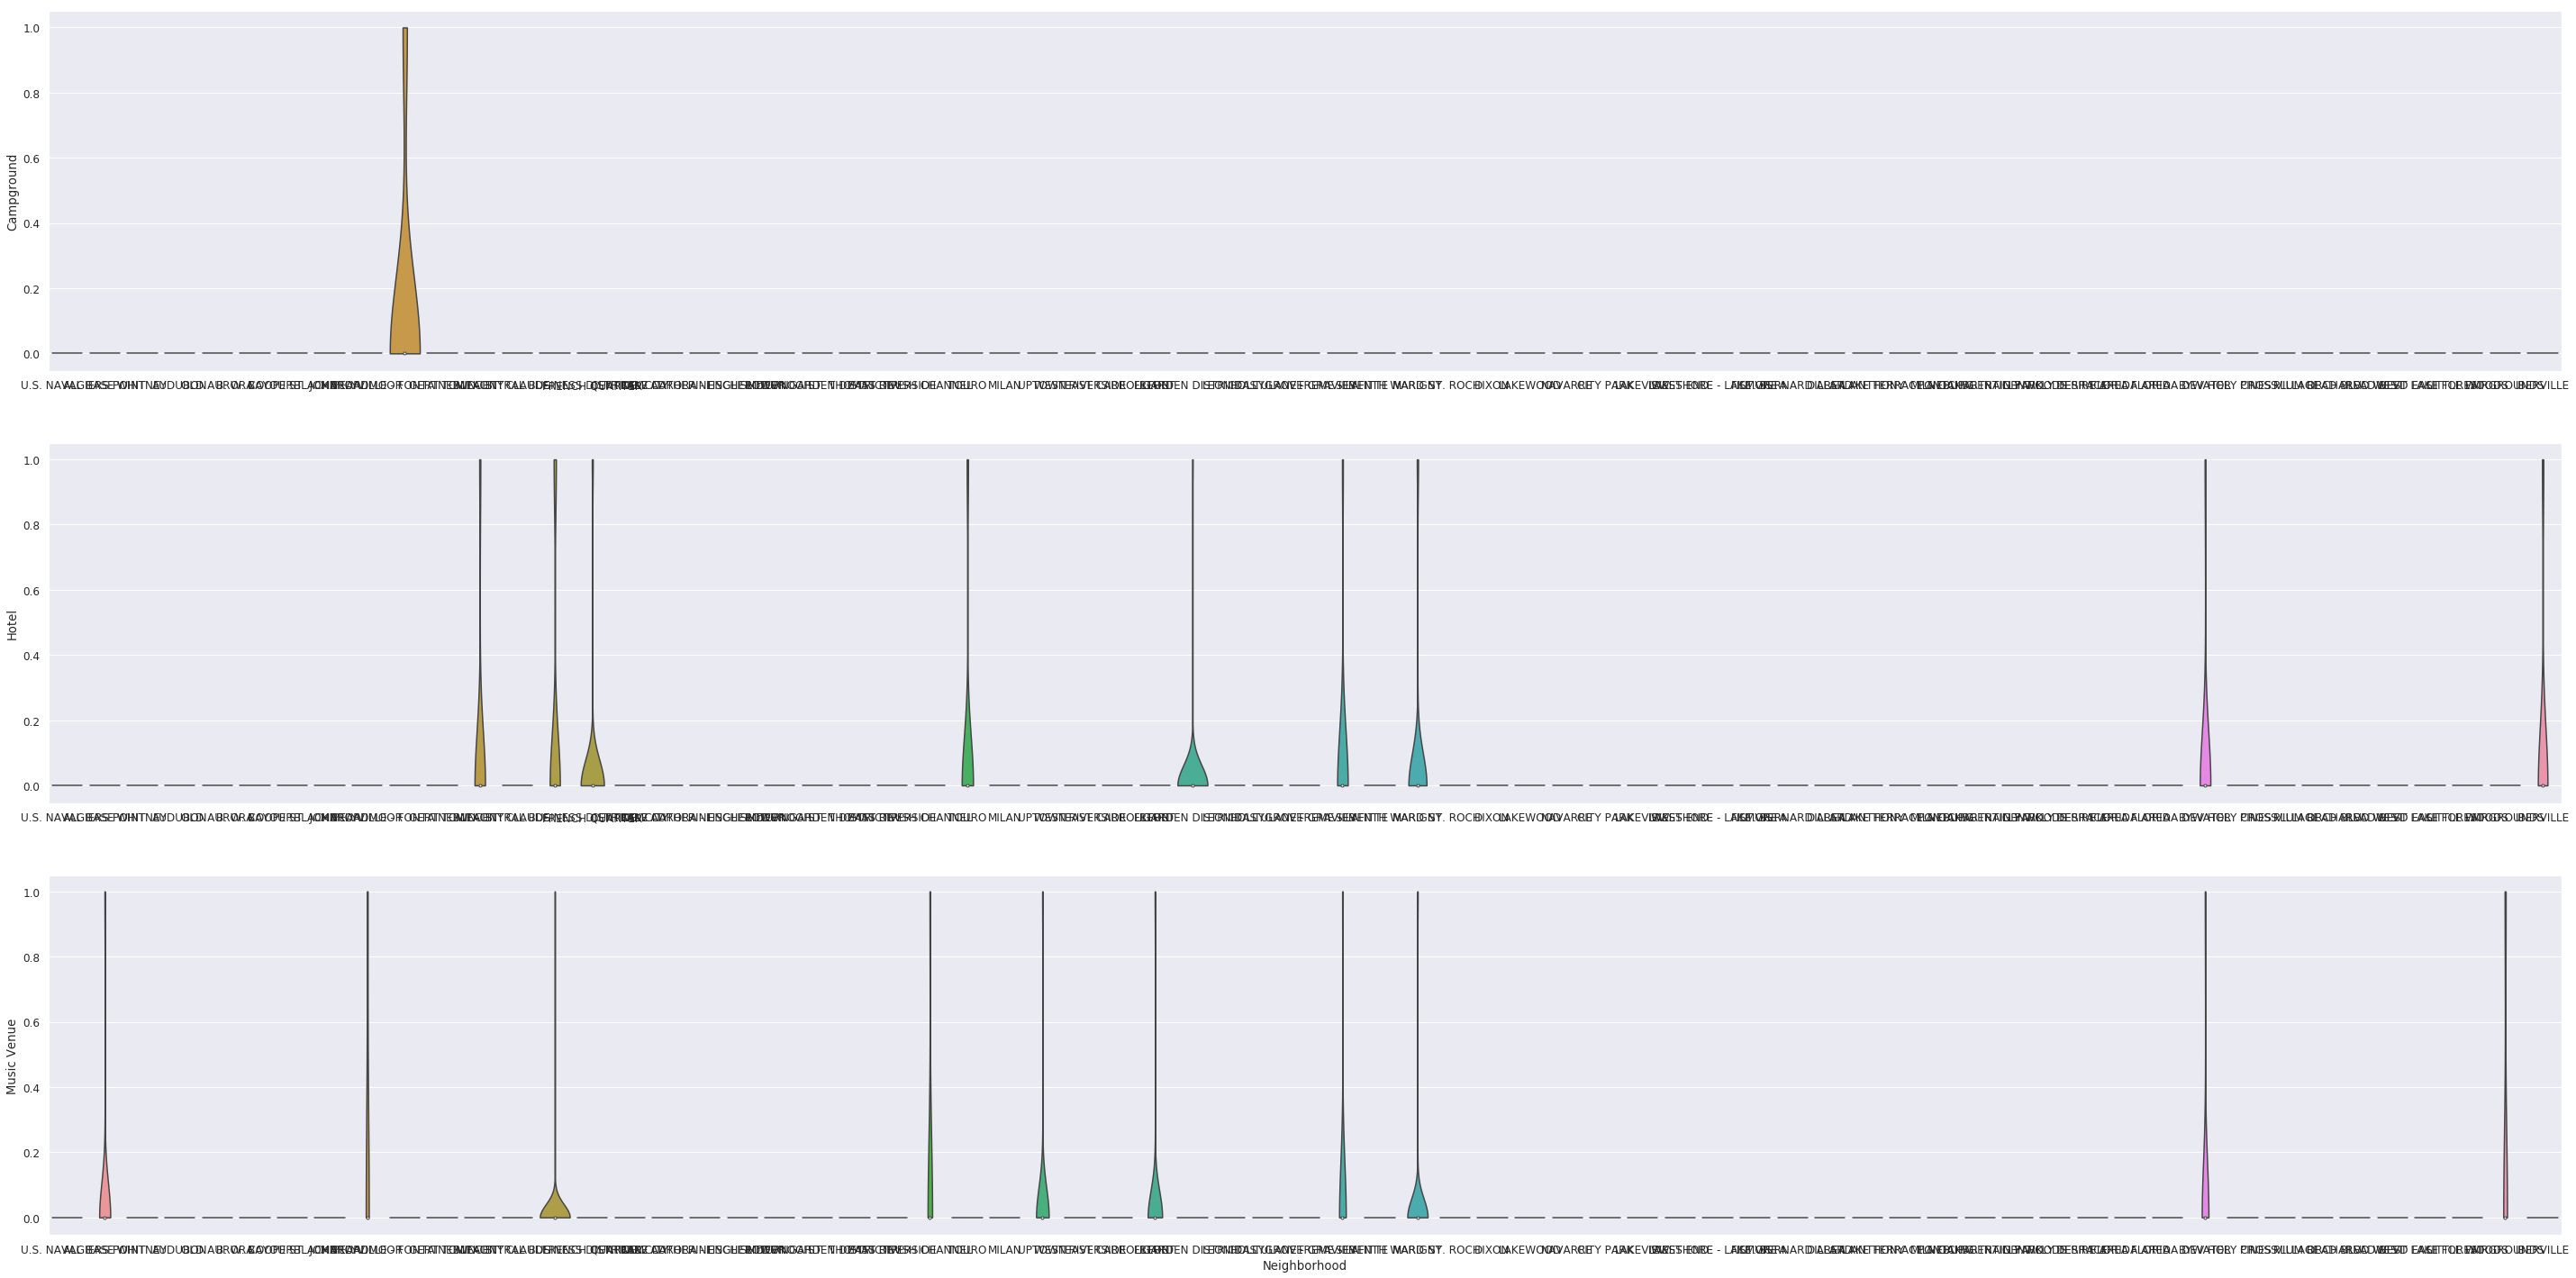

In [32]:
#Plot
#Violin plot is used for density estimation
#If Mia had established some criteria, it would be here (3 venue types for comparisson)
#Let's pick Campgroung, Hotel and Music Venue because it gives us more data to analyse)

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x='Neighborhood', y='Campground', data=new_orleans_onehot, cut=0);
plt.xlabel('')

ax = plt.subplot(3,1,2)
sns.violinplot(x='Neighborhood', y='Hotel', data=new_orleans_onehot, cut=0);
plt.xlabel('')

ax = plt.subplot(3,1,3)
sns.violinplot(x='Neighborhood', y='Music Venue', data=new_orleans_onehot, cut=0);

plt.savefig ('Dist_freq_venues.png', dpi=240)
plt.show()

#### Let's analize this further

So far there are not much venues, that means that any business that will open in New Orleans is more than welcome. Let's assume Mia get's a food truck. Where are the neighborhoods that have those?

#### Analysing the venue category "Food Truck"

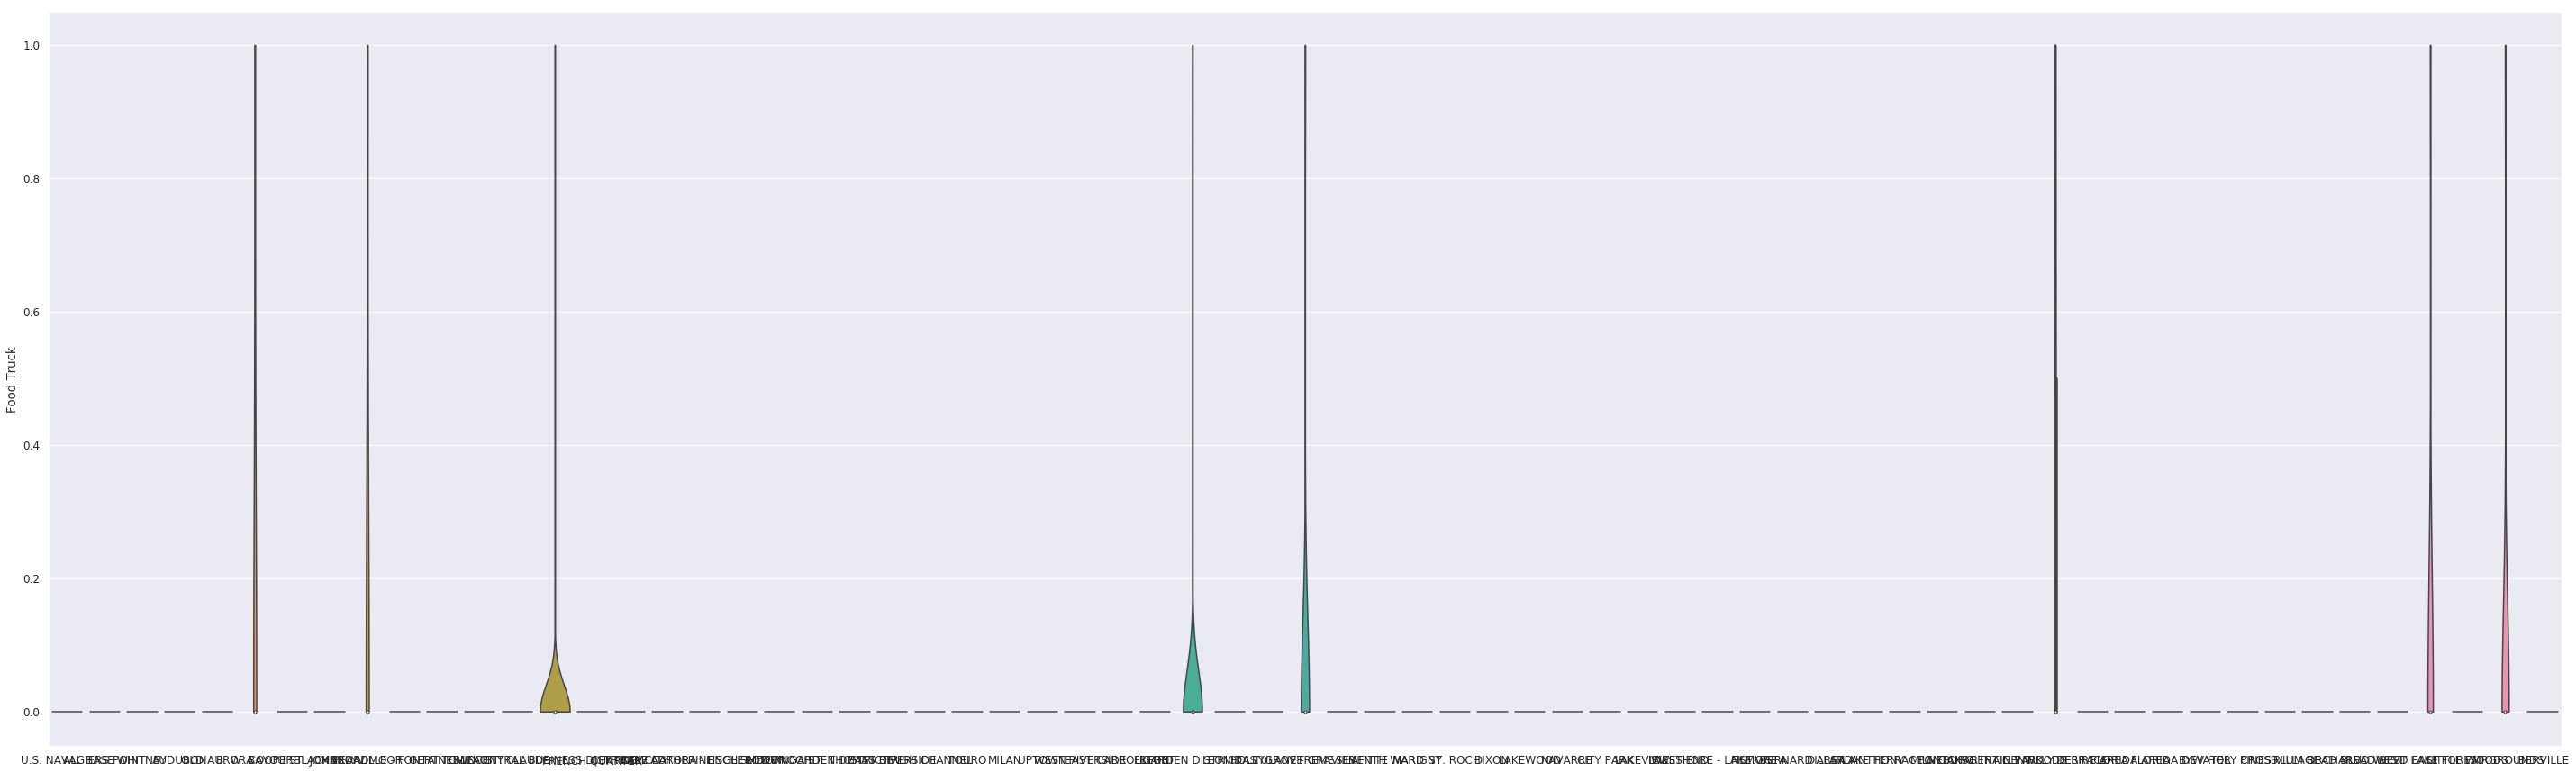

In [33]:
# Add the food truck category

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x='Neighborhood', y='Food Truck', data=new_orleans_onehot, cut=0);
plt.xlabel('')

plt.savefig ('Dist_freq_truck_venue.png', dpi=240)
plt.show()

There are 8 neighborhoods that have a frequency density of food trucks, in other meaning there is direct competition on these neighborhoods. 

#### Adding this category to the previous analysis for comparison

In [ ]:
#Adding the food truck to compare with previous results and compare

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x='Neighborhood', y='Campground', data=new_orleans_onehot, cut=0);
plt.xlabel('')

ax = plt.subplot(4,1,2)
sns.violinplot(x='Neighborhood', y='Hotel', data=new_orleans_onehot, cut=0);
plt.xlabel('')

ax = plt.subplot(4,1,3)
sns.violinplot(x='Neighborhood', y='Music Venue', data=new_orleans_onehot, cut=0);

ax = plt.subplot(4,1,4)
sns.violinplot(x='Neighborhood', y='Food Truck', data=new_orleans_onehot, cut=0);

plt.savefig ('Dist_freq_venues_compare.png', dpi=240)
plt.show()

## 4. Discussion and conclusions

No matter what criteria was used, the data shows us the truth. It identifies us the neighborhoods that really would need investment in infrastructure and that any business is welcome.

That said, for Mia, what would be more sensible than opening a sandwich shop in a specific neighborhood, would make more sense to have a food truck and go for the venues that can atract more people, like Music venues when there is a show, outside hotels on weekends, parks and campgrounds during the day.



**Conclusions**

Data is data and for sure with the same data, things could have being manipulated in a different way, with different set of data sources. The analysis made here was with my limited knowledge on the subject and lot of internet search to how to meet the wanted result.
But at the end learned new things, and that is always positive.